### ESMA 3016
### Lab8 : Datos Bivariados:
### Edgar Acuna
#### Septiembre  2019
#### Se usaran las librerias pandas, numpy, matplotlib, plotnine, statmodels y seaborn para hacer tablas de clasificacion
#### cruzada y graficas de barras en cluster o en stack, boxplots para comparar grupos scatterplots y la linea de regresion (prediccion)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import plotnine
import statsmodels.formula.api as sm 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

### Caso I: Ambas variables categoricas

In [2]:
#Leyendo los datost"
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje316.txt",sep="\s+")
df.head()

,escuela,aprueba
0,priv,si
1,priv,no
2,publ,no
3,priv,si
4,publ,si


In [3]:
# Haciendo una tabla de clasificacion cruzada para relacionar las variables escuela y
#y si aprueba o no la primera clase matematicas en el Colegio
#los datos estan sueltos
pd.crosstab(df['escuela'],df['aprueba'],margins=True)

aprueba,no,si,All
escuela,,,
priv,3,7,10
publ,5,5,10
All,8,12,20


Comentario: (7/10)*100=70% de los estudiantes de escuela privada aprueban l;a primera clase de mate

Comentario (5/12)*100=41.66%  de los estudiantes que aprueban la clase de MATE son de escuela publica

In [4]:
# Haciendo una tabla de clasificacion cruzada con datos resumidos
df=pd.read_csv("https://academic.uprm.edu/eacuna/eje2biv.csv",sep=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
Sexo       6 non-null object
Opinion    6 non-null object
conteo     6 non-null int64
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [5]:
#construyendo la tabla
pd.pivot_table(df,values='conteo',index='Sexo',columns='Opinion',aggfunc=np.sum)

Opinion,abst,no,si
Sexo,,,
female,44,31,15
male,30,20,10


a)	¿Qué porcentaje de los entrevistados son  mujeres Y se abstienen de opinar?
   Contestacion 44/(44+31+15+30+20+10)*100=44*100/150=29.33%

c) De los entrevistados que están a favor de la ley. ¿Qué porcentaje son varones?
Contestacion: 10*100/25=40%

In [6]:
#Haciendo una tabla de clasificacion xruzada sin datos resumidos
#Este conjunto de datos esta disponible en kaggle.com
df=pd.read_csv("http://academic.uprm.edu/eacuna/student-mat.csv",sep=",")

In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [9]:
df.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


In [10]:
# Haciendo una tabla de clasificacion cruzada para relacionar las variables school y
#Pstatus (situacion de los padres: A=estan separados T=estans juntos)
#los datos estan sueltos
pd.crosstab(df['school'],df['Pstatus'],margins=True)

Pstatus,A,T,All
school,,,
GP,38,311,349
MS,3,43,46
All,41,354,395


In [11]:
#Hallando proporciones por columna
pd.crosstab(df['school'],df['Pstatus'],normalize='columns')

Pstatus,A,T
school,,
GP,0.926829,0.878531
MS,0.073171,0.121469


In [12]:
#Hallando porcentajes por filas
pd.crosstab(df['school'],df['Pstatus'],normalize='index')*100

Pstatus,A,T
school,,
GP,10.888252,89.111748
MS,6.521739,93.478261


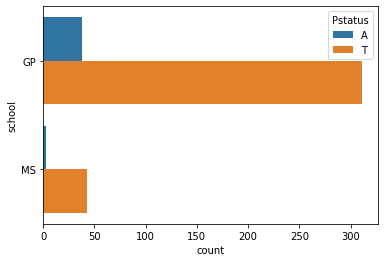

In [13]:
# Barras horizontales en cluster usando seaborn
sns.countplot(y='school', hue='Pstatus', data=df,orient='h')

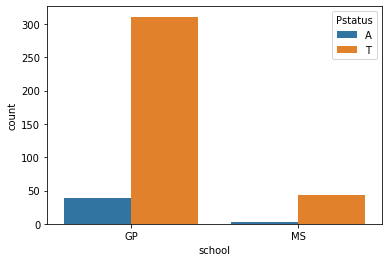

In [14]:
# Barras verticales  en cluster usando seaborn
sns.countplot(x='school', hue='Pstatus', data=df,orient='v')

In [15]:
# Obteniendo una tabla resumida para hacer las graficas de barras en matplotlib
p_table = pd.pivot_table(df,index='Pstatus',columns='school',aggfunc='size')
p_table

school,GP,MS
Pstatus,,
A,38,3
T,311,43


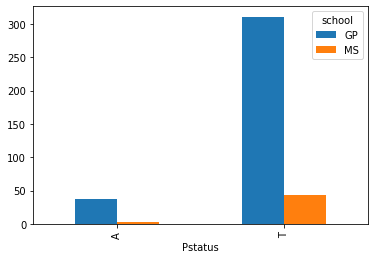

In [16]:
#Barras en cluster usando matplotlib
p_table.plot.bar(stacked=False)

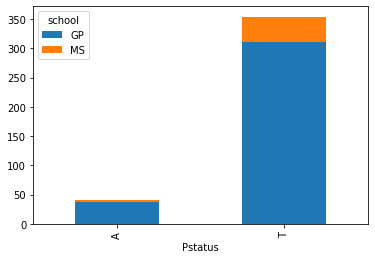

In [17]:
#Barras en stack usando matplotlib
p_table.plot.bar(stacked=True)

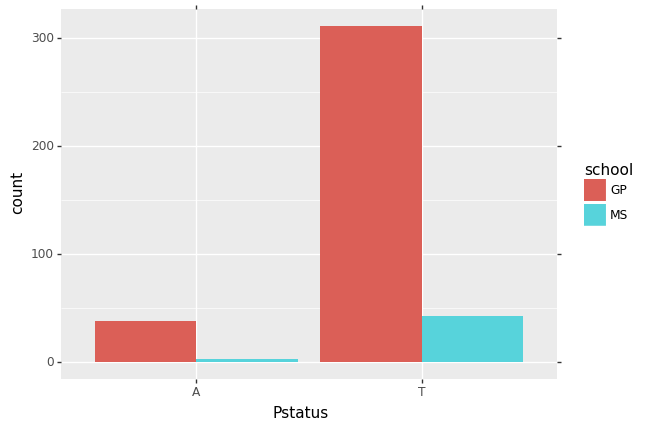

<ggplot: (119515305336)>

In [18]:
#cluster barras usando plotnine
from plotnine import *
#clustered bars
(ggplot(df, aes(x='Pstatus', fill='school'))
+ geom_bar(stat='count', position='dodge'))

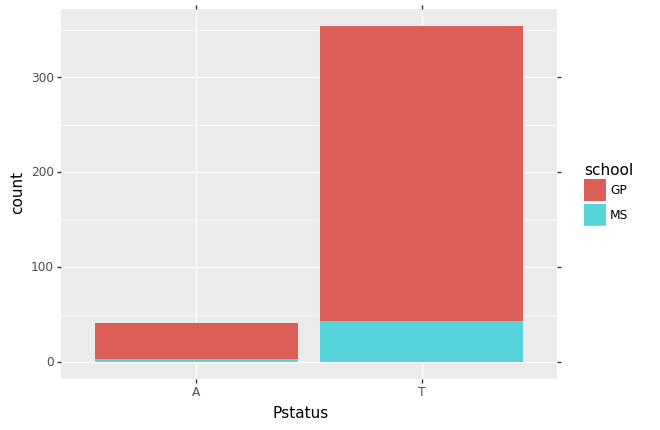

<ggplot: (119515379604)>

In [19]:
#Stacked bars usnado plotnine
(ggplot(df,aes(x='Pstatus',fill='school'))+geom_bar(stat='count'))

### Caso II. Una variable categoria y la otra cuantitativa

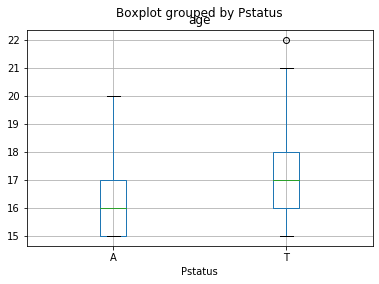

In [20]:
df.boxplot(column='age',by='Pstatus')

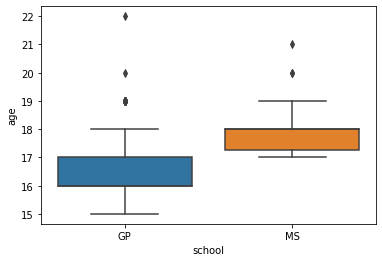

In [21]:
# Barras horizontales en cluster usando seaborn
sns.boxplot(x='school', y='age', data=df,orient='v')

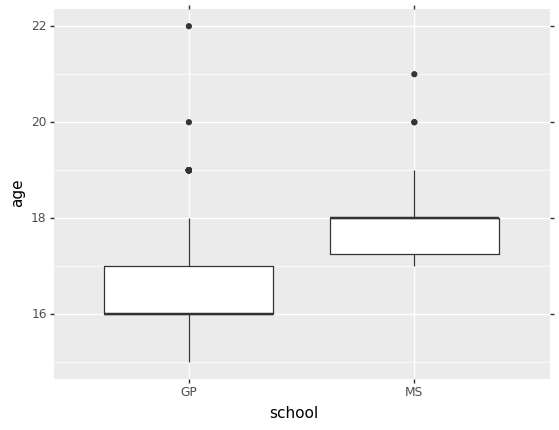

<ggplot: (-9223371917339728503)>

In [22]:
#usando plotnine
(ggplot(df,aes(x='school',y='age'))+geom_boxplot())

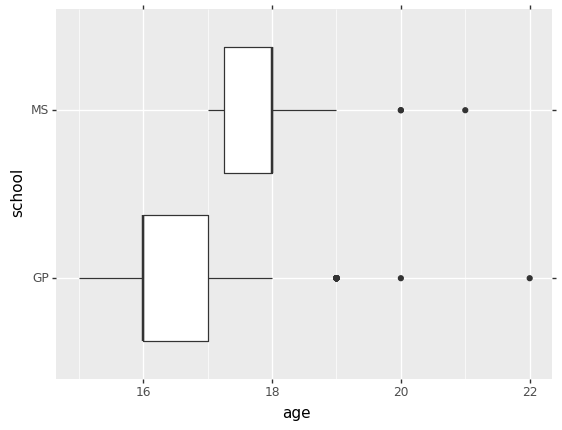

<ggplot: (119515017939)>

In [23]:
#Boxplot horizontales usando plotnine
(ggplot(df,aes(x='school',y='age'))+geom_boxplot()+coord_flip())

### Caso III. Ambas variables son cuantitativas

In [24]:
#Leyendo los datost"
df=pd.read_table("http://academic.uprm.edu/eacuna/eje1reg.txt",sep="\s+")
df.head()

,Est,CEEB,GPA
0,1,425,2.81
1,2,495,2.56
2,3,600,2.92
3,4,610,3.18
4,5,612,2.51


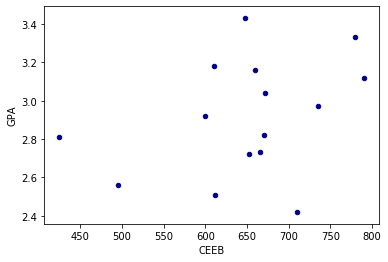

In [25]:
#scatterplot usando matplotlib
df.plot.scatter('CEEB','GPA',c='DarkBlue')

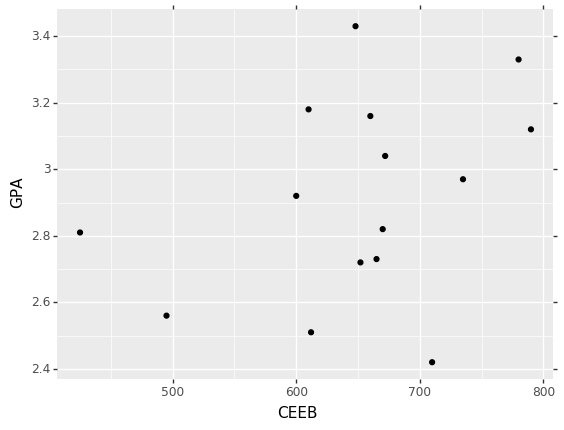

<ggplot: (119515606287)>

In [26]:
#scatterplot usando plotnine
(ggplot(df,aes(x='CEEB',y='GPA'))+geom_point())

In [27]:
#calculo de la correlacion
df.corr()['GPA']['CEEB']

0.3480352973395258

In [28]:
# calculo  de la linea de regresion
result = sm.ols(formula="GPA ~ CEEB", data=df).fit()
print(result.params)

Intercept    2.209878
CEEB         0.001087
dtype: float64


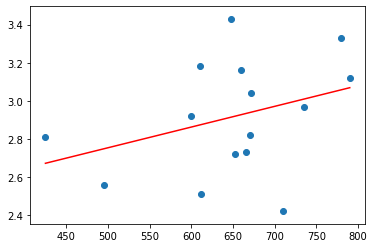

In [29]:
# Ploteando los puntos y la linea de regresion
x=df['CEEB']
y=df['GPA']
plt.scatter(x,y)
plt.plot(x, np.poly1d(np.polyfit(x, y, 1))(x),color='red')

plt.show()

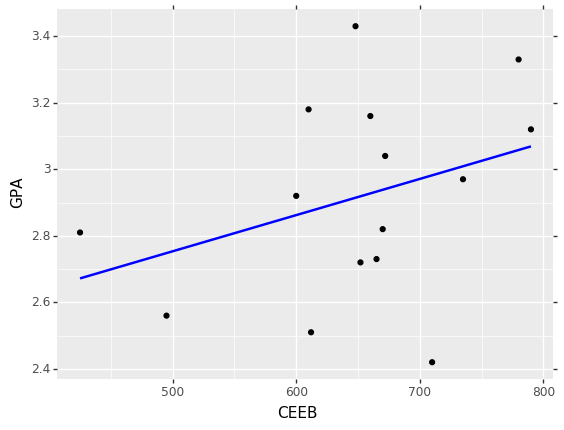

<ggplot: (-9223371917339366084)>

In [30]:
#Ploteando la linea de regresion usando plotnine
(ggplot(df, aes(x='CEEB', y='GPA')) + geom_point() + stat_smooth(method='lm',color='blue',se=False, span=0.2))

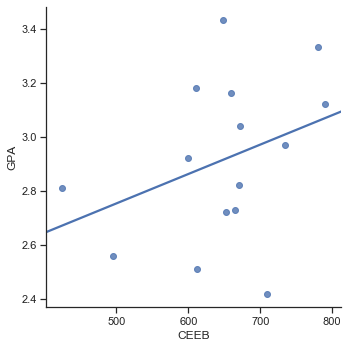

In [31]:
#PLoteando la linea de regresion usando seaborn
sns.set(style="ticks")
sns.lmplot("CEEB", "GPA", data=df,ci=False) 

### Plotting a time series

In [33]:
#dfts=pd.read_csv("c://esma3016/heartts.csv")
dfts=pd.read_csv("https://raw.githubusercontent.com/eacunafer/DataAnalysiswithPython3/master/Datasets/heartts.csv")
dfts.set_index('time', inplace=True)

In [34]:
dfts.head()

,heartrate
time,
12/23/2016 19:45,49.00
12/23/2016 19:45,49.50
12/23/2016 19:45,50.33
12/23/2016 19:45,51.00
12/23/2016 19:45,51.40


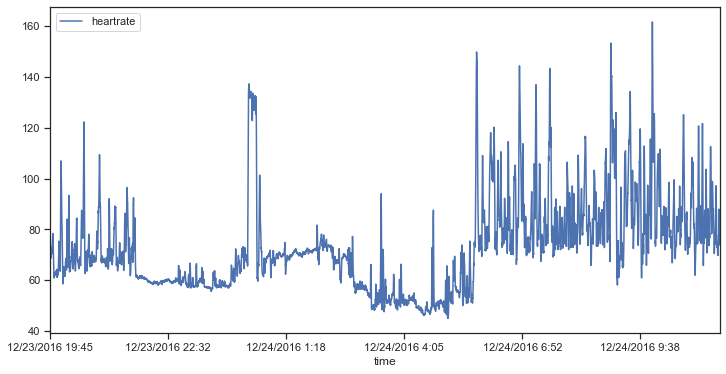

In [35]:
dfts.plot(figsize=[12,6])